# Efficiency Plots for 2017:

Check efficiency plots w.r.t the reference (noringer)

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop, load_hdf
from core import Efficiency, restore_efficiencies
from Gaugi import mkdir_p, progressbar
import numpy as np
import pandas as pd
import collections
import os
import rootplotlib as rpl
from pprint import pprint
from copy import deepcopy
import gc
from ROOT import kBlack,kBlue,kRed,kAzure,kGreen,kMagenta,kCyan,kOrange,kGray,kYellow,kWhite,TColor,gStyle

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence
INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.

Applying ATLAS style settings...

Applying ATLAS style settings...

Applying ATLAS style settings...


## 1) Read all files:

In [3]:
output_path = 'output/efficiencies'
#output_path = ''
mkdir_p(output_path)

In [ ]:
eff_data17_Zee_noringer  = restore_efficiencies( '../data/output/emulation/data17_Zee_efficiency_noringer.root' )
eff_data17_JF17_noringer = restore_efficiencies( '../data/output/emulation/data17_JF17_efficiency_noringer.root')

In [ ]:
eff_data17_Zee_v8  = restore_efficiencies( 'v8/output/emulation/data17_Zee_efficiency_v8.root'  )
eff_data17_Zee_v12 = restore_efficiencies( 'v12/output/emulation/data17_Zee_efficiency_v12.root')

In [ ]:
eff_data17_JF17_v8  = restore_efficiencies( 'v8/output/emulation/data17_JF17_efficiency_v8.root'  )
eff_data17_JF17_v12 = restore_efficiencies( 'v12/output/emulation/data17_JF17_efficiency_v12.root')

In [ ]:
def add_legend(x, y, legends):
    rpl.add_legend( legends,x,y,x+0.98,y+0.25,textsize=18, option='p' )

In [8]:
legends = ['with Ringer (v8)', 
           'with Ringer (v12)',
           'without Ringer']

## 1) HLT_e17

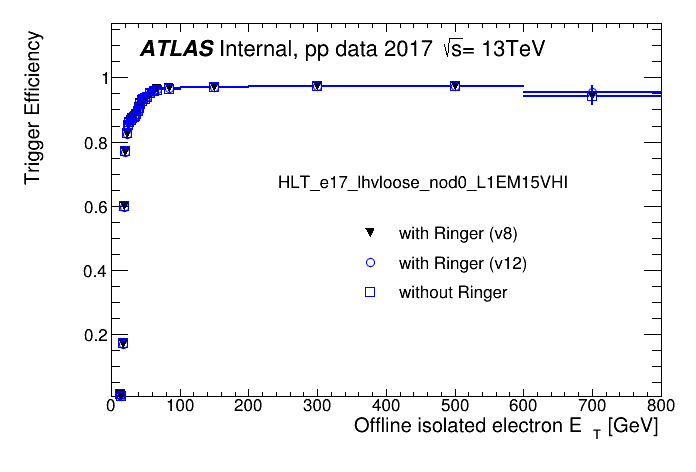

In [9]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25]

hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.4, 0.6, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_v8_and_v12_2017_HLT_highet.pdf')

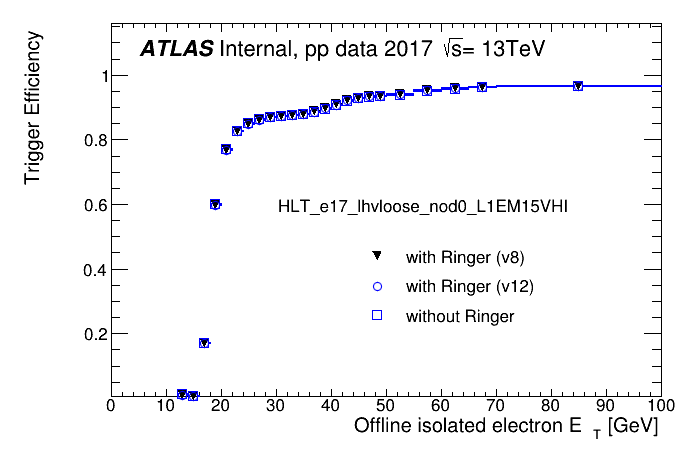

In [10]:
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.50,0.3, legends)
rpl.add_text( 0.4, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_v8_and_v12_2017_HLT_et.pdf')

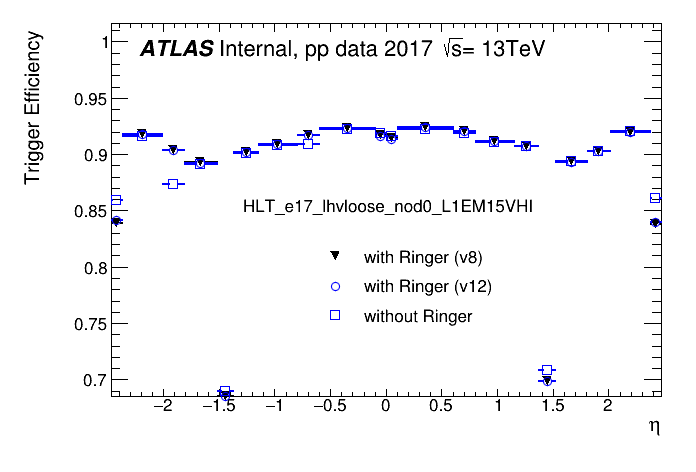

In [11]:
colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]

colors = [kBlack, kBlue, kBlue, kBlue, kBlue]

markers = [23, 24,25,26,32]
hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.44,0.3, legends)
rpl.add_text( 0.35, 0.55, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_v8_and_v12_2017_HLT_eta.pdf')

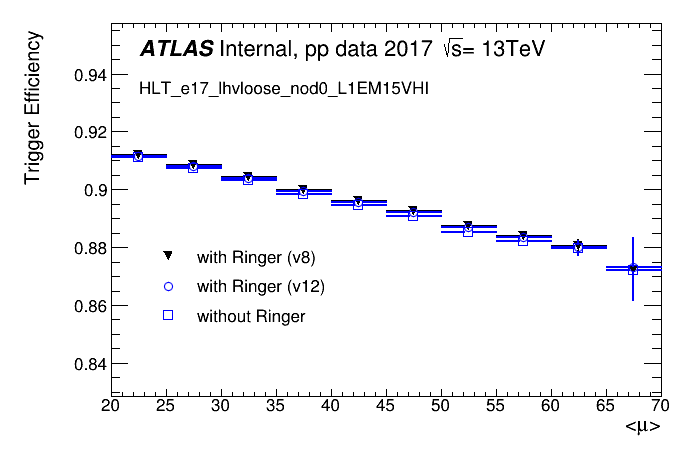

In [12]:
colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]

markers = [23, 24,25,26,32]
hists = [
            eff_data17_Zee_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI'  , 'HLT','mu'),
            eff_data17_Zee_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI'  , 'HLT','mu'),
        ]

hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]



fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.2,0.3, legends)
rpl.add_text( 0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.05, yminf=0.95) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e17_ringer_v8_and_v12_2017_HLT_mu.pdf')

# 2) HLT e28:

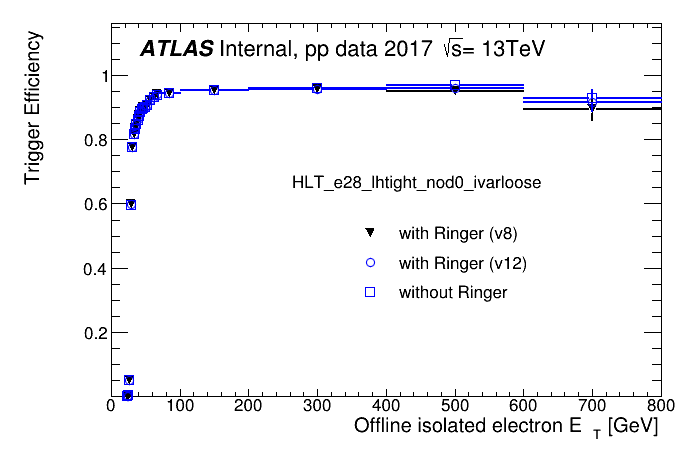

In [13]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','highet'),
            eff_data17_Zee_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'HLT','highet'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_noringer_ivarloose'  , 'HLT','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.49,0.35, legends)
rpl.add_text( 0.42, 0.6, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_v12_2017_HLT_highet.pdf')

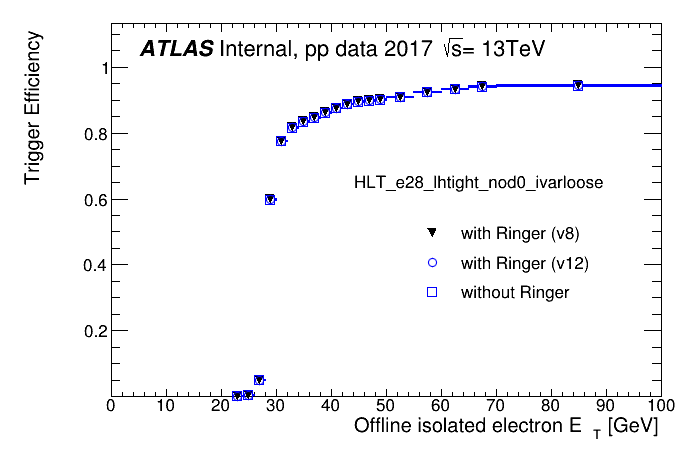

In [14]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','et'),
            eff_data17_Zee_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'HLT','et'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_noringer_ivarloose'  , 'HLT','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.58,0.35, legends)
rpl.add_text( 0.51, 0.6, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_v12_2017_HLT_et.pdf')

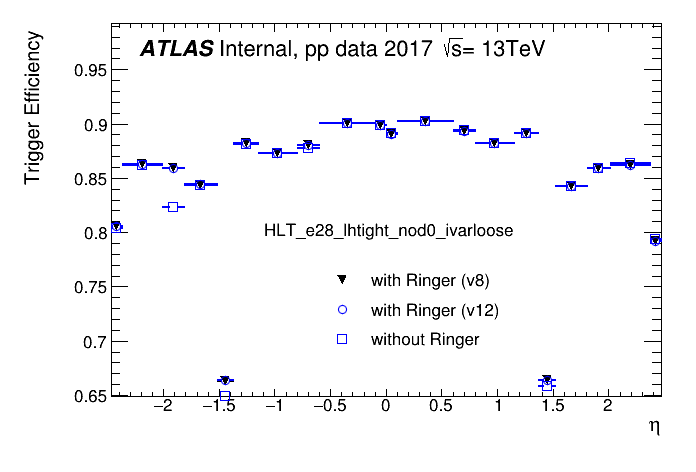

In [15]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','eta'),
            eff_data17_Zee_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'HLT','eta'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_noringer_ivarloose'  , 'HLT','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.45,0.25, legends)
rpl.add_text( 0.38, 0.5, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.1) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_v12_2017_HLT_eta.pdf')

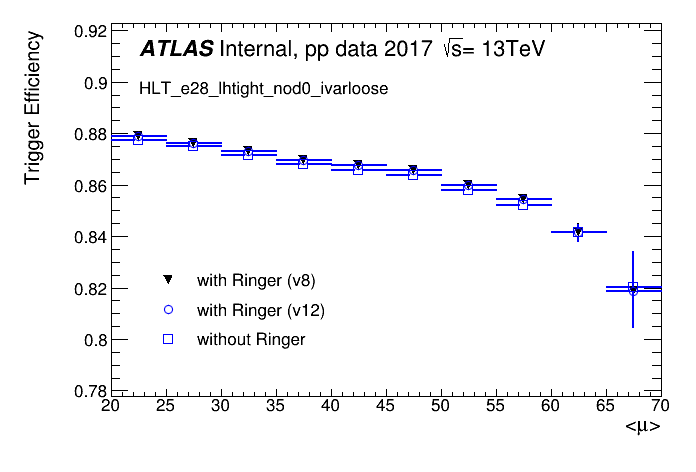

In [16]:
#colors = [kBlack,kBlue-4, kBlue-3, kBlue-2, kBlue-1]
colors = [kBlack, kBlue, kBlue, kBlue, kBlue]
#markers = [23, 24,25,26,27]
markers = [23, 24,25,26,32]

hists = [
            eff_data17_Zee_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose'  , 'HLT','mu'),
            eff_data17_Zee_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'HLT','mu'),
            eff_data17_Zee_ref.profile('HLT_e28_lhtight_nod0_noringer_ivarloose'  , 'HLT','mu'),
        ]
hists = [ rpl.hist1d.rebin( h , 10, 20, 70 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
add_legend( 0.2,0.25, legends)
rpl.add_text( 0.2, 0.8, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.05, yminf=0.95) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM1_e28_ringer_v8_and_v12_2017_HLT_mu.pdf')

# HLT_e17:

In [17]:
legends = ['with Ringer (v8)', 
           'with Ringer (v12)',
           ]

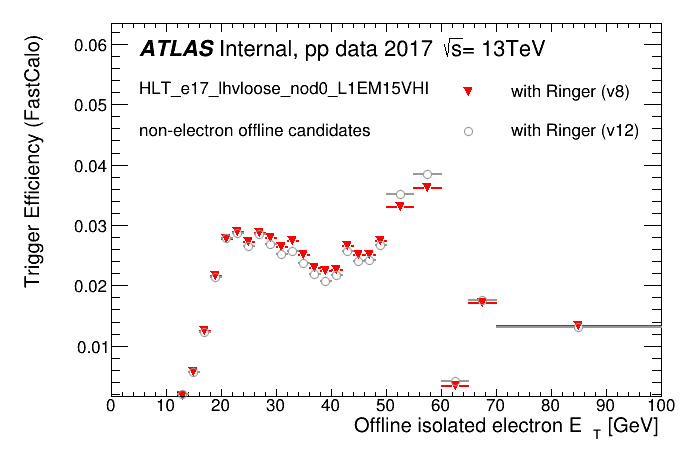

In [18]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','et'),
            eff_data17_JF17_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'L2Calo','et'),
            #eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.65) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_v8_and_v12_2017_L2Calo_et.pdf')

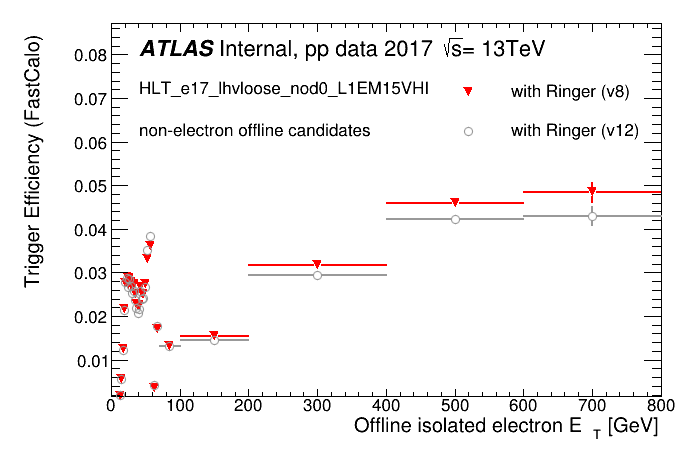

In [19]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','highet'),
            eff_data17_JF17_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'L2Calo','highet'),
            #eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.8) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_v8_and_v12_2017_L2Calo_highet.pdf')

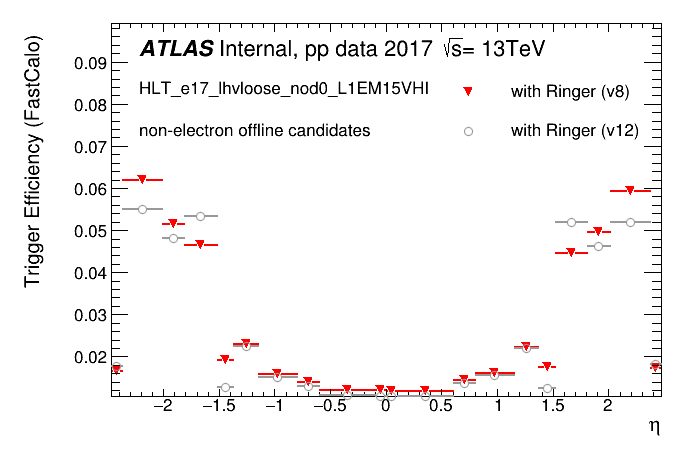

In [20]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','eta'),
            eff_data17_JF17_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'L2Calo','eta'),
            #eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.6) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_v8_and_v12_2017_L2Calo_eta.pdf')

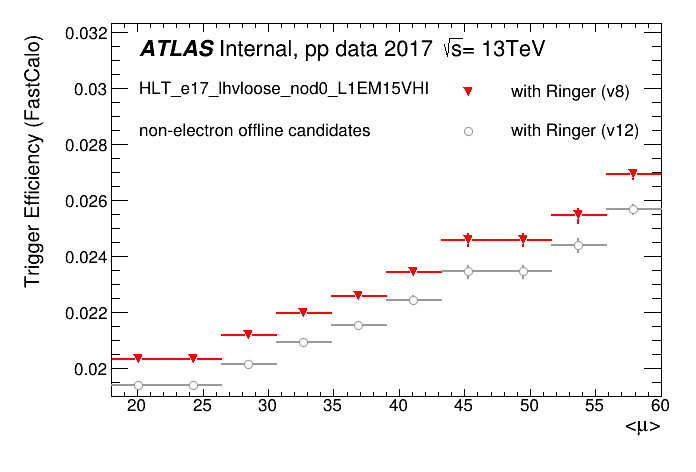

In [21]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e17_lhvloose_nod0_ringer_v8_L1EM15VHI', 'L2Calo','mu'),
            eff_data17_JF17_v12.profile('HLT_e17_lhvloose_nod0_ringer_v12_L1EM15VHI', 'L2Calo','mu'),
            #eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'L2Calo','et'),
        ]
hists = [ rpl.hist1d.rebin( h , 10, 18, 60 ) for h in hists ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e17_lhvloose_nod0_L1EM15VHI", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.2, yminf=0.98) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e17_ringer_v8_and_v12_2017_L2Calo_mu.pdf')

# HLT_e28:

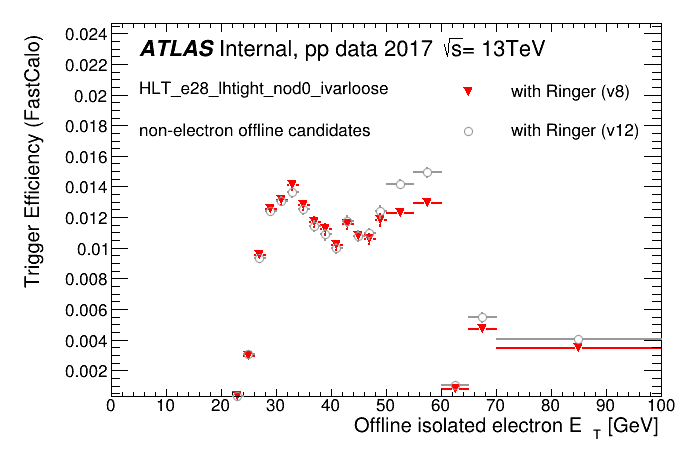

In [22]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','et'),
            eff_data17_JF17_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'L2Calo','et'),
            #eff_data17_JF17_ref.profile('HLT_e17_lhvloose_nod0_noringer_L1EM15VHI', 'L2Calo','et'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.65) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_v12_2017_L2Calo_et.pdf')

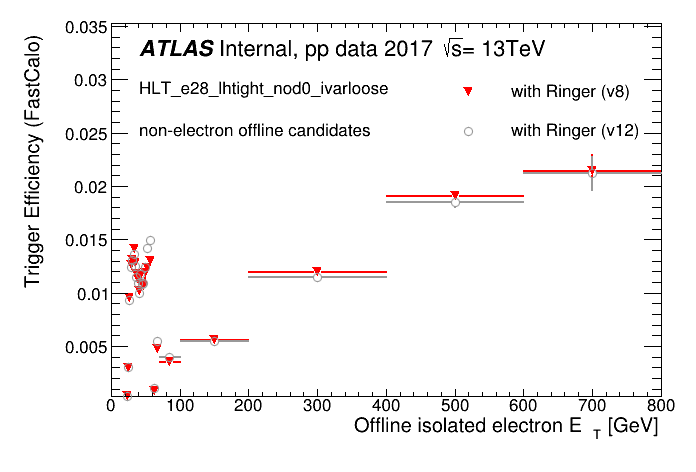

In [23]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','highet'),
            eff_data17_JF17_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'L2Calo','highet'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, 'Offline isolated electron E_{T} [GeV]', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.65) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_v12_2017_L2Calo_highet.pdf')

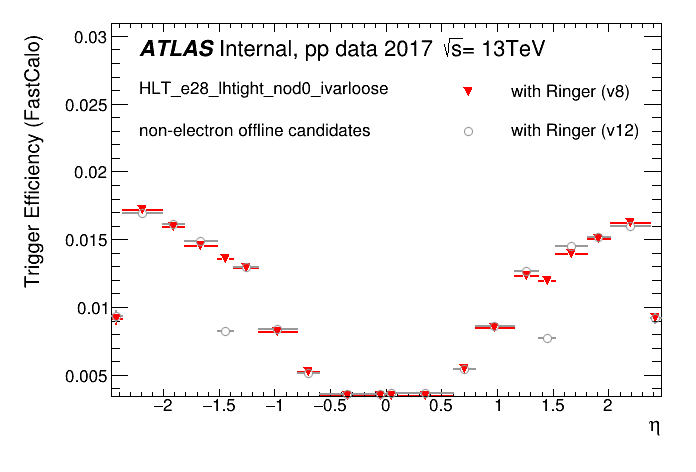

In [24]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','eta'),
            eff_data17_JF17_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'L2Calo','eta'),
        ]

fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '#eta', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.8) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_v12_2017_L2Calo_eta.pdf')

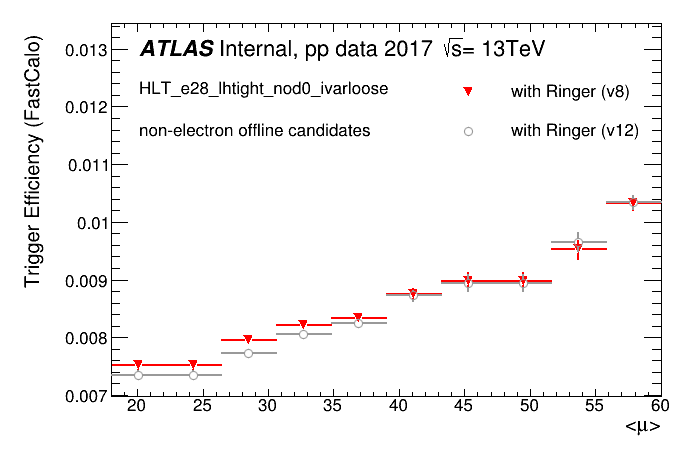

In [25]:
colors = [kRed,kGray+1,kGray+1,kGray+1,kGray+1,]
markers = [23, 24,25,26,32]


hists = [
            eff_data17_JF17_v8.profile('HLT_e28_lhtight_nod0_ringer_v8_ivarloose', 'L2Calo','mu'),
            eff_data17_JF17_v12.profile('HLT_e28_lhtight_nod0_ringer_v12_ivarloose', 'L2Calo','mu'),
        ]
hists = [ rpl.hist1d.rebin( h , 10, 18, 60 ) for h in hists ]


fig = rpl.create_canvas('my_canvas')
rpl.plot_profiles( hists, '<#mu>', colors, markers )
rpl.set_atlas_label(0.2,0.88,'Internal, pp data 2017 #sqrt{s}= 13TeV')
rpl.add_text(0.2, 0.80, "HLT_e28_lhtight_nod0_ivarloose", textsize=0.04)
rpl.add_text(0.2, 0.71, 'non-electron offline candidates', textsize=0.04)
add_legend( 0.61,0.68, legends)
rpl.set_ylabel('Trigger Efficiency (FastCalo)')
rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , ymaxf=1.3, yminf=0.95) 
fig.show()
fig.savefig(output_path+'/eff_emu_EGAM7_e28_ringer_v8_and_v12_2017_L2Calo_mu.pdf')